In [154]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
import tensorflow as tf
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#dataset
from keras.datasets import mnist
import numpy as np

In [155]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


# Define the Sparse Regularizer

In [156]:
def sparse_regularizer(activation_matrix):
    p = 0.001
    beta = 3
    p_hat = K.mean(activation_matrix) 
  
    KL_divergence = p*(K.log(p/p_hat)) + (1-p)*(K.log(1-p/1-p_hat))
    
    sum = K.sum(KL_divergence) 
   
    return beta * sum

In [157]:
encoding_dim = 200
lambda_ = 0.00001 
input_img = Input(shape=(784,))

#Define the encoder which takes the images as the inputs and returns the code:

encoder = Dense(encoding_dim, 
                activation='relu',
                kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(input_img)

In [158]:
decoder = Dense(784,
                activation='relu',
                kernel_regularizer=regularizers.l2(lambda_/2),activity_regularizer=sparse_regularizer)(encoder)

In [159]:
model = Model(input_img, decoder)
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_31 (Dense)             (None, 784)               157584    
Total params: 314,584
Trainable params: 314,584
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.compile(optimizer='adam', loss='mse')

In [161]:
hist=model.fit(x_train, x_train, epochs=50, batch_size=10000, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0988 - val_loss: 0.0818
Epoch 2/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0751 - val_loss: 0.0667
Epoch 3/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0631 - val_loss: 0.0581
Epoch 4/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0549 - val_loss: 0.0498
Epoch 5/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0470 - val_loss: 0.0427
Epoch 6/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0407 - val_loss: 0.0370
Epoch 7/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0354 - val_loss: 0.0324
Epoch 8/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0311 - val_loss: 0.0286
Epoch 9/50
60000/60000 [==============================] - 0s 3us/sample - loss: 0.0276 - val_loss: 0.

In [162]:
decoded_img = model.predict(x_test)

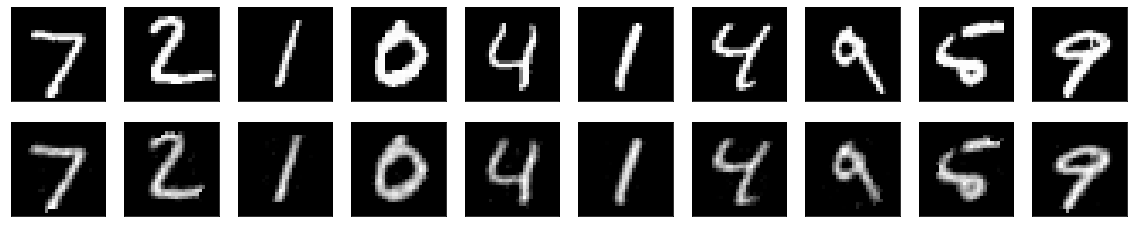

In [163]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

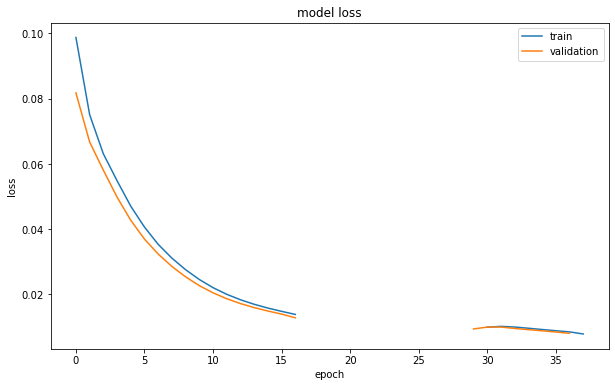

In [164]:
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()